<a href="https://colab.research.google.com/github/hhhh-369/hhhhqx/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import statsmodels.api as sm
import seaborn as sb
import networkx as nx

from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm

# Define the colouration scheme

hsvp = cm.get_cmap("gist_rainbow")

In [45]:
deprivation=pd.read_csv('deprivation.csv')

deprivation.head()

,ward,wardcode,dnone,dnonep,done,donep,dtwo,dtwop,dthree,dthreep,dfour,dfourp
0,Astley Bridge,E05000650,"2,956",49.6,"1,990",33.4,837,14.0,174,2.9,5,0.1
1,Bradshaw,E05000651,"2,502",50.5,"1,665",33.6,628,12.7,151,3.1,4,0.1
2,Breightmet,E05000652,"2,195",36.5,"2,118",35.2,"1,224",20.4,450,7.5,24,0.4
3,Bromley Cross,E05000653,"3,483",58.4,"1,848",31.0,548,9.2,79,1.3,4,0.1
4,Crompton (Bolton),E05000654,"2,523",37.4,"2,326",34.5,"1,376",20.4,502,7.4,22,0.3


In [54]:
TS0120=pd.read_csv('TS0120.csv')
TS0120.head()

,wardname,wardcode,total,loneparent_num,loneparent_p,populationdensity,0-17_num,0-17_p,18-39_num,18-39_p,...,deprivation0_num,deprivation0_p,deprivation1_num,deprivation1_p,deprivation2_num,deprivation2_p,deprivation3_num,deprivation3_p,deprivation4_num,deprivation4_p
0,Astley Bridge,E05000650,14139,655,11.0,2143.2,3098,0.22,3529,0.25,...,2956,49.6,1990,33.4,837,14.0,174,2.9,5,0.1
1,Bradshaw,E05000651,11532,469,9.5,1244.2,2374,0.21,2423,0.21,...,2502,50.5,1665,33.6,628,12.7,151,3.1,4,0.1
2,Breightmet,E05000652,14400,1026,17.1,3880.6,3566,0.25,3682,0.26,...,2195,36.5,2118,35.2,1224,20.4,450,7.5,24,0.4
3,Bromley Cross,E05000653,13635,522,8.8,1955.9,2642,0.19,2962,0.22,...,3483,58.4,1848,31.0,548,9.2,79,1.3,4,0.1
4,Crompton (Bolton),E05000654,17582,925,13.7,5029.6,4700,0.27,5807,0.33,...,2523,37.4,2326,34.5,1376,20.4,502,7.4,22,0.3


In [46]:
# 计算贫困分数
deprivation['dscore']=0*deprivation['dnonep']+1*deprivation['donep']+2*deprivation['dtwop']+3*deprivation['dthreep']+4*deprivation['dfourp']
deprivation.head()

,ward,wardcode,dnone,dnonep,done,donep,dtwo,dtwop,dthree,dthreep,dfour,dfourp,dscore
0,Astley Bridge,E05000650,"2,956",49.6,"1,990",33.4,837,14.0,174,2.9,5,0.1,70.5
1,Bradshaw,E05000651,"2,502",50.5,"1,665",33.6,628,12.7,151,3.1,4,0.1,68.7
2,Breightmet,E05000652,"2,195",36.5,"2,118",35.2,"1,224",20.4,450,7.5,24,0.4,100.1
3,Bromley Cross,E05000653,"3,483",58.4,"1,848",31.0,548,9.2,79,1.3,4,0.1,53.7
4,Crompton (Bolton),E05000654,"2,523",37.4,"2,326",34.5,"1,376",20.4,502,7.4,22,0.3,98.7


In [47]:
deprivation['dscore']

0       70.5
1       68.7
2      100.1
3       53.7
4       98.7
       ...  
292    109.1
293    111.1
294     88.2
295     65.9
296     56.5
Name: dscore, Length: 297, dtype: float64

In [48]:
# 计算这十四个地区的中位数
# 创建一个新的DataFrame并直接使用中位数作为数据
# ward_score = pd.DataFrame({
#    'wnonep': [deprivation['dnonep'].median()],
#    'wonep': [deprivation['donep'].median()],
#    'wtwop': [deprivation['dtwop'].median()],
#    'wthreep': [deprivation['dthreep'].median()],
#    'wfourp': [deprivation['dfourp'].median()]
#})

# 显示表格的前几行
# ward_score.head()

In [49]:

wnonep=deprivation['dnonep'].median()
wonep=deprivation['donep'].median()
wtwop=deprivation['dtwop'].median()
wthreep=deprivation['dthreep'].median()
wfourp=deprivation['dfourp'].median()

print(wnonep,wonep,wtwop,wthreep,wfourp)

44.9 33.4 16.1 4.7 0.2


In [50]:
# 计算十四个地区的贫困分数
wscore=(f"{0*wnonep+1*wonep+2*wtwop+3*wthreep+4*wfourp:.2f}")
print(wscore)

80.50


In [51]:
# range(deprivation.shape[0])

In [58]:
deprivation['depri'] = (deprivation['dscore'] > 80.50) * 1

deprivation.head()

,ward,wardcode,dnone,dnonep,done,donep,dtwo,dtwop,dthree,dthreep,dfour,dfourp,dscore,depri
0,Astley Bridge,E05000650,"2,956",49.6,"1,990",33.4,837,14.0,174,2.9,5,0.1,70.5,0
1,Bradshaw,E05000651,"2,502",50.5,"1,665",33.6,628,12.7,151,3.1,4,0.1,68.7,0
2,Breightmet,E05000652,"2,195",36.5,"2,118",35.2,"1,224",20.4,450,7.5,24,0.4,100.1,1
3,Bromley Cross,E05000653,"3,483",58.4,"1,848",31.0,548,9.2,79,1.3,4,0.1,53.7,0
4,Crompton (Bolton),E05000654,"2,523",37.4,"2,326",34.5,"1,376",20.4,502,7.4,22,0.3,98.7,1


In [53]:
deprivation.to_csv('deprivation_score.csv')

In [55]:
# merge deprivation and TS0120
data=deprivation.merge(TS0120,left_on='wardcode',right_on='wardcode')
data.head()

,ward,wardcode,dnone,dnonep,done,donep,dtwo,dtwop,dthree,dthreep,...,deprivation0_num,deprivation0_p,deprivation1_num,deprivation1_p,deprivation2_num,deprivation2_p,deprivation3_num,deprivation3_p,deprivation4_num,deprivation4_p
0,Astley Bridge,E05000650,"2,956",49.6,"1,990",33.4,837,14.0,174,2.9,...,2956,49.6,1990,33.4,837,14.0,174,2.9,5,0.1
1,Bradshaw,E05000651,"2,502",50.5,"1,665",33.6,628,12.7,151,3.1,...,2502,50.5,1665,33.6,628,12.7,151,3.1,4,0.1
2,Breightmet,E05000652,"2,195",36.5,"2,118",35.2,"1,224",20.4,450,7.5,...,2195,36.5,2118,35.2,1224,20.4,450,7.5,24,0.4
3,Bromley Cross,E05000653,"3,483",58.4,"1,848",31.0,548,9.2,79,1.3,...,3483,58.4,1848,31.0,548,9.2,79,1.3,4,0.1
4,Crompton (Bolton),E05000654,"2,523",37.4,"2,326",34.5,"1,376",20.4,502,7.4,...,2523,37.4,2326,34.5,1376,20.4,502,7.4,22,0.3


In [70]:
TS0120=pd.read_csv('TS0120.csv')
TS2040=pd.read_csv('TS2040.csv')
TS4060=pd.read_csv('TS4060.csv')
TS6080=pd.read_csv('TS6080.csv')

In [71]:
TS0120.head()

,wardname,wardcode,total,loneparent_num,loneparent_p,populationdensity,0-17_num,0-17_p,18-39_num,18-39_p,...,deprivation0_num,deprivation0_p,deprivation1_num,deprivation1_p,deprivation2_num,deprivation2_p,deprivation3_num,deprivation3_p,deprivation4_num,deprivation4_p
0,Astley Bridge,E05000650,14139,655,11.0,2143.2,3098,0.22,3529,0.25,...,2956,49.6,1990,33.4,837,14.0,174,2.9,5,0.1
1,Bradshaw,E05000651,11532,469,9.5,1244.2,2374,0.21,2423,0.21,...,2502,50.5,1665,33.6,628,12.7,151,3.1,4,0.1
2,Breightmet,E05000652,14400,1026,17.1,3880.6,3566,0.25,3682,0.26,...,2195,36.5,2118,35.2,1224,20.4,450,7.5,24,0.4
3,Bromley Cross,E05000653,13635,522,8.8,1955.9,2642,0.19,2962,0.22,...,3483,58.4,1848,31.0,548,9.2,79,1.3,4,0.1
4,Crompton (Bolton),E05000654,17582,925,13.7,5029.6,4700,0.27,5807,0.33,...,2523,37.4,2326,34.5,1376,20.4,502,7.4,22,0.3


In [72]:
TS2040.head()

,wardname,wardcode,Asian,Asianp,Black,Blackp,Mixed_ethic,Mixed_ethicp,White,Whitep,...,Bad_health,Bad_healthp,Disabled,Disabledp,household_disabled,household_disabledp,English_not_main,English_not_mainp,English_bad,English_badp
0,Astley Bridge,E05000650,"2,426",17.2,207,1.5,295,2.1,"11,073",78.3,...,770,5.5,"2,453",17.3,"2,620",18.5,663,4.8,138,1.0
1,Bradshaw,E05000651,159,1.4,155,1.3,355,3.1,"10,800",93.6,...,656,5.7,"2,146",18.6,"2,283",19.8,254,2.3,60,0.5
2,Breightmet,E05000652,509,3.5,573,4.0,340,2.4,"12,823",89.1,...,1097,7.6,"3,286",22.8,"3,550",24.6,662,4.7,161,1.2
3,Bromley Cross,E05000653,223,1.6,32,0.2,233,1.7,"13,110",96.1,...,509,3.7,"2,052",15.0,"2,152",15.7,126,0.9,21,0.1
4,Crompton (Bolton),E05000654,"7,186",40.9,922,5.2,446,2.5,"8,623",49.0,...,1078,6.1,"2,981",17.0,"3,246",18.5,"3,374",20.1,994,5.9


In [76]:
TS4060.head()

# TS4060.drop('Unnamed: 0')
TS4060 = TS4060.drop(TS4060.columns[0], axis=1)
TS4060.head()


,ward,wardcode,totalhouseholds,broom1,broom1p,broom2,broom2p,broom3,broom3p,broom4,...,par15,par15p,par1630,par1630p,ftime,ftimep,f3148,f3148p,f49,f49p
0,Astley Bridge,E05000650,"5,962",529,8.9,"1,863",31.2,"2,438",40.9,"1,132",...,627,9.6,"1,426",21.9,"4,452",68.4,"3,891",59.8,561,8.6
1,Bradshaw,E05000651,"4,951",199,4.0,"1,280",25.9,"2,479",50.1,993,...,481,10.0,942,19.5,"3,402",70.5,"2,967",61.5,435,9.0
2,Breightmet,E05000652,"6,012",651,10.8,"1,877",31.2,"3,003",49.9,484,...,496,8.7,"1,296",22.6,"3,934",68.7,"3,540",61.8,394,6.9
3,Bromley Cross,E05000653,"5,963",276,4.6,"1,641",27.5,"2,423",40.6,"1,622",...,587,8.7,"1,226",18.3,"4,898",73.0,"4,178",62.3,720,10.7
4,Crompton (Bolton),E05000654,"6,749",838,12.4,"2,933",43.5,"2,156",31.9,822,...,703,9.9,"1,736",24.5,"4,641",65.6,"4,236",59.8,405,5.7


In [78]:
TS6080.head()

TS6080 = TS6080.drop(TS6080.columns[0], axis=1)
TS6080.head()

,ward,wardcode,w12m,w12mp,nonw12m,nonw12mp,nevw,nevwp,qnone,qnonep,...,none,nonep,afnone,afnonep,afone,afonep,aftwo,aftwop,afthree,afthreep
0,Astley Bridge,E05000650,494,10.1,"3,114",63.6,"1,285",26.3,"1,999",17.5,...,"11,012",96.6,"5,588",93.7,365,6.1,9,0.2,0,0.0
1,Bradshaw,E05000651,389,8.4,"3,310",71.5,929,20.1,"1,599",16.9,...,"9,083",96.1,"4,585",92.6,362,7.3,4,0.1,1,0.0
2,Breightmet,E05000652,538,9.8,"3,291",59.9,"1,661",30.3,"2,903",25.9,...,"10,810",96.4,"5,625",93.6,376,6.3,8,0.1,3,0.0
3,Bromley Cross,E05000653,505,10.9,"3,311",71.4,821,17.7,"1,368",12.1,...,"10,932",96.3,"5,558",93.2,391,6.6,12,0.2,0,0.0
4,Crompton (Bolton),E05000654,715,11.4,"2,715",43.4,"2,826",45.2,"3,658",27.4,...,"13,063",98.0,"6,485",96.1,257,3.8,7,0.1,0,0.0


In [80]:
TS0120=TS0120.drop('wardname',axis=1)
TS0120.head()


,wardcode,total,loneparent_num,loneparent_p,populationdensity,0-17_num,0-17_p,18-39_num,18-39_p,40-59_num,...,deprivation0_num,deprivation0_p,deprivation1_num,deprivation1_p,deprivation2_num,deprivation2_p,deprivation3_num,deprivation3_p,deprivation4_num,deprivation4_p
0,E05000650,14139,655,11.0,2143.2,3098,0.22,3529,0.25,3925,...,2956,49.6,1990,33.4,837,14.0,174,2.9,5,0.1
1,E05000651,11532,469,9.5,1244.2,2374,0.21,2423,0.21,2885,...,2502,50.5,1665,33.6,628,12.7,151,3.1,4,0.1
2,E05000652,14400,1026,17.1,3880.6,3566,0.25,3682,0.26,3687,...,2195,36.5,2118,35.2,1224,20.4,450,7.5,24,0.4
3,E05000653,13635,522,8.8,1955.9,2642,0.19,2962,0.22,3988,...,3483,58.4,1848,31.0,548,9.2,79,1.3,4,0.1
4,E05000654,17582,925,13.7,5029.6,4700,0.27,5807,0.33,4333,...,2523,37.4,2326,34.5,1376,20.4,502,7.4,22,0.3


In [81]:
TS2040=TS2040.drop('wardname',axis=1)
TS0120.head()

,wardcode,total,loneparent_num,loneparent_p,populationdensity,0-17_num,0-17_p,18-39_num,18-39_p,40-59_num,...,deprivation0_num,deprivation0_p,deprivation1_num,deprivation1_p,deprivation2_num,deprivation2_p,deprivation3_num,deprivation3_p,deprivation4_num,deprivation4_p
0,E05000650,14139,655,11.0,2143.2,3098,0.22,3529,0.25,3925,...,2956,49.6,1990,33.4,837,14.0,174,2.9,5,0.1
1,E05000651,11532,469,9.5,1244.2,2374,0.21,2423,0.21,2885,...,2502,50.5,1665,33.6,628,12.7,151,3.1,4,0.1
2,E05000652,14400,1026,17.1,3880.6,3566,0.25,3682,0.26,3687,...,2195,36.5,2118,35.2,1224,20.4,450,7.5,24,0.4
3,E05000653,13635,522,8.8,1955.9,2642,0.19,2962,0.22,3988,...,3483,58.4,1848,31.0,548,9.2,79,1.3,4,0.1
4,E05000654,17582,925,13.7,5029.6,4700,0.27,5807,0.33,4333,...,2523,37.4,2326,34.5,1376,20.4,502,7.4,22,0.3


In [82]:
TS4060=TS4060.drop('ward',axis=1)
TS4060.head()

,wardcode,totalhouseholds,broom1,broom1p,broom2,broom2p,broom3,broom3p,broom4,broom4p,...,par15,par15p,par1630,par1630p,ftime,ftimep,f3148,f3148p,f49,f49p
0,E05000650,"5,962",529,8.9,"1,863",31.2,"2,438",40.9,"1,132",19.0,...,627,9.6,"1,426",21.9,"4,452",68.4,"3,891",59.8,561,8.6
1,E05000651,"4,951",199,4.0,"1,280",25.9,"2,479",50.1,993,20.1,...,481,10.0,942,19.5,"3,402",70.5,"2,967",61.5,435,9.0
2,E05000652,"6,012",651,10.8,"1,877",31.2,"3,003",49.9,484,8.0,...,496,8.7,"1,296",22.6,"3,934",68.7,"3,540",61.8,394,6.9
3,E05000653,"5,963",276,4.6,"1,641",27.5,"2,423",40.6,"1,622",27.2,...,587,8.7,"1,226",18.3,"4,898",73.0,"4,178",62.3,720,10.7
4,E05000654,"6,749",838,12.4,"2,933",43.5,"2,156",31.9,822,12.2,...,703,9.9,"1,736",24.5,"4,641",65.6,"4,236",59.8,405,5.7


In [83]:
TS6080=TS6080.drop('ward',axis=1)
TS6080.head()

,wardcode,w12m,w12mp,nonw12m,nonw12mp,nevw,nevwp,qnone,qnonep,qone,...,none,nonep,afnone,afnonep,afone,afonep,aftwo,aftwop,afthree,afthreep
0,E05000650,494,10.1,"3,114",63.6,"1,285",26.3,"1,999",17.5,"1,171",...,"11,012",96.6,"5,588",93.7,365,6.1,9,0.2,0,0.0
1,E05000651,389,8.4,"3,310",71.5,929,20.1,"1,599",16.9,924,...,"9,083",96.1,"4,585",92.6,362,7.3,4,0.1,1,0.0
2,E05000652,538,9.8,"3,291",59.9,"1,661",30.3,"2,903",25.9,"1,327",...,"10,810",96.4,"5,625",93.6,376,6.3,8,0.1,3,0.0
3,E05000653,505,10.9,"3,311",71.4,821,17.7,"1,368",12.1,928,...,"10,932",96.3,"5,558",93.2,391,6.6,12,0.2,0,0.0
4,E05000654,715,11.4,"2,715",43.4,"2,826",45.2,"3,658",27.4,"1,539",...,"13,063",98.0,"6,485",96.1,257,3.8,7,0.1,0,0.0


In [120]:
data=deprivation.merge(TS0120,left_on='wardcode',right_on='wardcode')
data=data.merge(TS2040,left_on='wardcode',right_on='wardcode')
data=data.merge(TS4060,left_on='wardcode',right_on='wardcode')
data=data.merge(TS6080,left_on='wardcode',right_on='wardcode')
# data是deprivation+TS01-TS80选出来的集合变量的总和数据集
data.head()

,ward,wardcode,dnone,dnonep,done,donep,dtwo,dtwop,dthree,dthreep,...,none,nonep,afnone,afnonep,afone,afonep,aftwo,aftwop,afthree,afthreep
0,Astley Bridge,E05000650,"2,956",49.6,"1,990",33.4,837,14.0,174,2.9,...,"11,012",96.6,"5,588",93.7,365,6.1,9,0.2,0,0.0
1,Bradshaw,E05000651,"2,502",50.5,"1,665",33.6,628,12.7,151,3.1,...,"9,083",96.1,"4,585",92.6,362,7.3,4,0.1,1,0.0
2,Breightmet,E05000652,"2,195",36.5,"2,118",35.2,"1,224",20.4,450,7.5,...,"10,810",96.4,"5,625",93.6,376,6.3,8,0.1,3,0.0
3,Bromley Cross,E05000653,"3,483",58.4,"1,848",31.0,548,9.2,79,1.3,...,"10,932",96.3,"5,558",93.2,391,6.6,12,0.2,0,0.0
4,Crompton (Bolton),E05000654,"2,523",37.4,"2,326",34.5,"1,376",20.4,502,7.4,...,"13,063",98.0,"6,485",96.1,257,3.8,7,0.1,0,0.0


In [125]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Define a function to check if a column name ends with 'p' or '_p' (case-insensitive)
def ends_with_p(col_name):
    return col_name.lower().endswith('p') or col_name.lower().endswith('_p')

# Get the list of column names that end with 'p' or '_p'
columns_with_p = [col for col in data.columns if ends_with_p(col)]

# Extract the first two columns and the columns ending with 'p' or '_p'
extracted_columns = ['ward', 'wardcode','dscore','depri'] + columns_with_p
datap = data[extracted_columns]

datap.head()
# Now 'extracted_df' is the DataFrame with the desired columns


,ward,wardcode,dscore,depri,dnonep,donep,dtwop,dthreep,dfourp,loneparent_p,...,L14.1L14.2P,L15p,regafp,resafp,bothp,nonep,afnonep,afonep,aftwop,afthreep
0,Astley Bridge,E05000650,70.5,0,49.6,33.4,14.0,2.9,0.1,11.0,...,8.8,6.6,2.3,0.9,0.2,96.6,93.7,6.1,0.2,0.0
1,Bradshaw,E05000651,68.7,0,50.5,33.6,12.7,3.1,0.1,9.5,...,7.8,5.3,3.0,0.8,0.1,96.1,92.6,7.3,0.1,0.0
2,Breightmet,E05000652,100.1,1,36.5,35.2,20.4,7.5,0.4,17.1,...,13.1,6.2,2.8,0.7,0.1,96.4,93.6,6.3,0.1,0.0
3,Bromley Cross,E05000653,53.7,0,58.4,31.0,9.2,1.3,0.1,8.8,...,5.3,5.4,2.8,0.7,0.2,96.3,93.2,6.6,0.2,0.0
4,Crompton (Bolton),E05000654,98.7,1,37.4,34.5,20.4,7.4,0.3,13.7,...,17.8,8.8,1.5,0.4,0.1,98.0,96.1,3.8,0.1,0.0


In [126]:
datap.to_csv('datap.csv')

In [127]:
corr_matrix = datap.corr()
corr_matrix

<ipython-input-127-1e333dc15e8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datap.corr()


,dscore,depri,dnonep,donep,dtwop,dthreep,dfourp,loneparent_p,0-17_p,18-39_p,...,L14.1L14.2P,L15p,regafp,resafp,bothp,nonep,afnonep,afonep,aftwop,afthreep
dscore,1.000000,0.823093,-0.991300,0.649801,0.990259,0.968719,0.809000,0.830761,0.554181,0.142990,...,0.920031,0.128424,-0.153763,-0.138160,-0.008245,0.153273,0.194899,-0.195872,-0.118799,-0.036484
depri,0.823093,1.000000,-0.818202,0.546786,0.815550,0.794095,0.659984,0.718211,0.452286,0.154653,...,0.741163,0.100483,-0.127413,-0.154482,-0.038933,0.138400,0.189358,-0.192994,-0.057475,-0.060318
dnonep,-0.991300,-0.818202,1.000000,-0.741981,-0.986012,-0.930954,-0.776070,-0.814983,-0.559259,-0.090073,...,-0.903736,-0.106321,0.098454,0.129168,-0.023807,-0.105900,-0.141105,0.142375,0.069715,0.037540
donep,0.649801,0.546786,-0.741981,1.000000,0.647735,0.475865,0.426740,0.465862,0.417521,-0.178079,...,0.562152,-0.005005,0.170099,-0.084478,0.142913,-0.120878,-0.129696,0.127794,0.159142,-0.040495
dtwop,0.990259,0.815550,-0.986012,0.647735,1.000000,0.939294,0.764477,0.838590,0.553730,0.109210,...,0.901063,0.097575,-0.112276,-0.106369,0.023775,0.110468,0.150914,-0.152346,-0.076089,-0.028913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nonep,0.153273,0.138400,-0.105900,-0.120878,0.110468,0.231358,0.386635,-0.021643,0.195659,0.666984,...,0.341449,0.607047,-0.973769,-0.784585,-0.729577,1.000000,0.985440,-0.984718,-0.687726,-0.020401
afnonep,0.194899,0.189358,-0.141105,-0.129696,0.150914,0.282225,0.422054,0.026577,0.181455,0.692242,...,0.366252,0.577985,-0.956272,-0.784632,-0.708769,0.985440,1.000000,-0.999209,-0.696006,-0.009720
afonep,-0.195872,-0.192994,0.142375,0.127794,-0.152346,-0.282344,-0.422169,-0.027682,-0.180736,-0.694777,...,-0.366078,-0.581301,0.955718,0.783672,0.705676,-0.984718,-0.999209,1.000000,0.673636,0.006341
aftwop,-0.118799,-0.057475,0.069715,0.159142,-0.076089,-0.208421,-0.297424,-0.011924,-0.120346,-0.443677,...,-0.252982,-0.332585,0.663528,0.554499,0.542584,-0.687726,-0.696006,0.673636,1.000000,0.014954


In [149]:
corr_matrix['depri']

matrix=corr_matrix['depri']
matrix['twodisp']

0.6058524951068504

In [132]:
corr_sorted = corr_matrix['depri'].abs().sort_values(ascending=False)
corr_sorted

depri             1.000000
dscore            0.823093
deprivation0_p    0.818202
dnonep            0.818202
deprivation2_p    0.815550
                    ...   
broom3p           0.041395
bothp             0.038933
qapprp            0.027138
schoolchange_p    0.027056
w12mp             0.004915
Name: depri, Length: 105, dtype: float64

In [134]:
with open('corr_sorted.txt', 'w') as f:
    f.write(corr_sorted.to_string())

## 创建虚拟变量

In [221]:
# 职业
data['L16p']=data['L1L2L3p']+data['L4L5L6p']
data['highl']= (data['L16p']>data['L16p'].mean())*1
# family
data['lonem']=(data['loneparent_p']>data['loneparent_p'].mean())*1
# health
data['bhealm']=(data['Bad_healthp']>data['Bad_healthp'].mean())*1
# heating
data['heat1m']=(data['heat1p']>data['heat1p'].mean())*1
# disable
data['nodism']=(data['nodisp']>data['nodisp'].mean())*1
# qulification
data['qnonem']=(data['qnonep']>data['qnonep'].mean())*1
# data['highq']=(data['qfourp']>data['qnonep'])*1
# car
data['car2m']=(data['car2p']>data['car2p'].mean())*1

data.head()

,ward,wardcode,dnone,dnonep,done,donep,dtwo,dtwop,dthree,dthreep,...,nodism,highdis,qnonem,lowq,car0m,heat1m,highq,car2m,L16p,highl
0,Astley Bridge,E05000650,"2,956",49.6,"1,990",33.4,837,14.0,174,2.9,...,1,0,0,0,0,0,1,1,32.7,1
1,Bradshaw,E05000651,"2,502",50.5,"1,665",33.6,628,12.7,151,3.1,...,1,0,0,0,0,0,1,1,36.4,1
2,Breightmet,E05000652,"2,195",36.5,"2,118",35.2,"1,224",20.4,450,7.5,...,0,1,1,1,1,1,0,0,21.0,0
3,Bromley Cross,E05000653,"3,483",58.4,"1,848",31.0,548,9.2,79,1.3,...,1,0,0,0,0,0,1,1,44.3,1
4,Crompton (Bolton),E05000654,"2,523",37.4,"2,326",34.5,"1,376",20.4,502,7.4,...,1,0,1,1,1,1,0,0,20.1,0


In [222]:
df2=data[['highl','lonem','bhealm','heat1m','nodism','qnonem','car2m',
          'depri','dnonep','donep','dtwop','dthreep','dfourp',
          'L1L2L3p','L4L5L6p','L12p','L14.1L14.2P',
          'loneparent_p',
          'Bad_health',
          'heat1p','heat0p',
          'nodisp','onedisp','twodisp',
          'qnonep','qtwop','qthreep','qfourp',
          'car0','car1','car2','car3']]

sdep = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','q25','q50','q75','Max'], index=range(df2.shape[1]))

# for i in range(df2.shape[1]):
#    sdep.loc[i, 'Var'] = df2.columns[i]
#    sdep.loc[i, 'Mean'] = round(np.mean(df2.iloc[:, i]), 3)
#    sdep.loc[i, 'SD'] = round(statistics.stdev(df2.iloc[:, i]), 3)
#    sdep.loc[i, 'Min'] = round(min(df2.iloc[:, i]), 3)
#    sdep.loc[i, 'q25'] = round(np.quantile(df2.iloc[:, i], 0.25), 3)
#    sdep.loc[i, 'q50'] = round(np.quantile(df2.iloc[:, i], 0.50), 3)
#    sdep.loc[i, 'q75'] = round(np.quantile(df2.iloc[:, i], 0.75), 3)
#    sdep.loc[i, 'Max'] = round(max(df2.iloc[:, i]), 3)


In [223]:
df3=data[['depri','highl','lonem','bhealm','heat1m','nodism','qnonem','car2m']]

sdep = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','q25','q50','q75','Max'], index=range(df2.shape[1]))

for i in range(df3.shape[1]):
  sdep.loc[i,'Var'] = df3.columns[i]
  sdep.loc[i,'Mean'] = round(np.mean(df3.iloc[:,i]),3)
  sdep.loc[i,'SD'] = round(statistics.stdev(df3.iloc[:,i]),3)
  sdep.loc[i,'Min'] = round(min(df3.iloc[:,i]),3)
  sdep.loc[i,'q25'] = round(np.quantile(df3.iloc[:,i],0.25),3)
  sdep.loc[i,'q50'] = round(np.quantile(df3.iloc[:,i],0.50),3)
  sdep.loc[i,'q75'] = round(np.quantile(df3.iloc[:,i],0.75),3)
  sdep.loc[i,'Max'] = round(max(df3.iloc[:,i]),3)

# Latex output (If this part breaks then you can delete it)

lout = pd.DataFrame(columns=['outp'], index=range(sdep.shape[0]))

for i in range(df3.shape[1]):
    lout.loc[i,'outp'] = ["&" + str(sdep.loc[i,'Var']) + "&" + str(sdep.loc[i,'Mean']) + "&" + str(sdep.loc[i,'SD']) + "&"+ str(sdep.loc[i,'Min']) + "&" + str(sdep.loc[i,'q25']) + "&"+ str(sdep.loc[i,'q50']) +  "&" + str(sdep.loc[i,'q75']) + "&"+ str(sdep.loc[i,'Max']) + "&"+"\\"]

lout.to_csv('summarycl5r.txt', sep='\t', index=False)

lout.head()

# Correlation matrix

Corr_Matrix = round(df3.corr(),3)
print(Corr_Matrix)

lout = pd.DataFrame(columns=['outp'], index=range(Corr_Matrix.shape[0]))

for i in range(Corr_Matrix.shape[1]):
    for j in range(Corr_Matrix.shape[1]):
        lout.loc[i,'outp'] = str(lout.loc[i,'outp']) + "&" + str(Corr_Matrix.iloc[i,j])


#    ["&" + str(Corr_Matrix.iloc[i,0])+"&" + str(Corr_Matrix.iloc[i,1]) + "&" + str(Corr_Matrix.iloc[i,2])+ "&" + str(Corr_Matrix.iloc[i,3])+ "&" + str(Corr_Matrix.iloc[i,4])+ "&" + str(Corr_Matrix.iloc[i,5])+ "&" + str(Corr_Matrix.iloc[i,6])+ "&" + str(Corr_Matrix.iloc[i,7])+ "&" + str(Corr_Matrix.iloc[i,8])+ "&" + str(Corr_Matrix.iloc[i,9])+ "&" + str(Corr_Matrix.iloc[i,10])]

lout.to_csv('corr_df3.txt', sep='\t', index=False)

        depri  highl  lonem  bhealm  heat1m  nodism  qnonem  car2m
depri   1.000 -0.832  0.739   0.736   0.664  -0.719   0.866 -0.637
highl  -0.832  1.000 -0.762  -0.639  -0.614   0.648  -0.835  0.592
lonem   0.739 -0.762  1.000   0.630   0.548  -0.629   0.738 -0.616
bhealm  0.736 -0.639  0.630   1.000   0.451  -0.798   0.705 -0.516
heat1m  0.664 -0.614  0.548   0.451   1.000  -0.472   0.587 -0.697
nodism -0.719  0.648 -0.629  -0.798  -0.472   1.000  -0.664  0.461
qnonem  0.866 -0.835  0.738   0.705   0.587  -0.664   1.000 -0.556
car2m  -0.637  0.592 -0.616  -0.516  -0.697   0.461  -0.556  1.000


In [224]:
# 回归
cdf = pd.DataFrame(df3['depri'])
adf = pd.DataFrame(df3[['highl','lonem','bhealm','heat1m','nodism','qnonem','car2m']])
xdf = sm.add_constant(adf)

results = sm.OLS(cdf,xdf).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  depri   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          1.94e-110
Time:                        20:00:36   Log-Likelihood:                 55.383
No. Observations:                 297   AIC:                            -94.77
Df Residuals:                     289   BIC:                            -65.22
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3921      0.068      5.796      0.0

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(xdf,i) for i in range(xdf.shape[1])],index=xdf.columns)

const     32.798470
highl      4.184147
lonem      2.958536
bhealm     3.395372
heat1m     2.284851
nodism     3.117332
qnonem     4.181202
car2m      2.382374
dtype: float64

In [255]:
df3['predictions'] = results.fittedvalues
df3['residuals']=df3['depri']-df3['predictions']

<ipython-input-255-89de52ffa9a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['predictions'] = results.fittedvalues
<ipython-input-255-89de52ffa9a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['residuals']=df3['depri']-df3['predictions']


<Axes: >

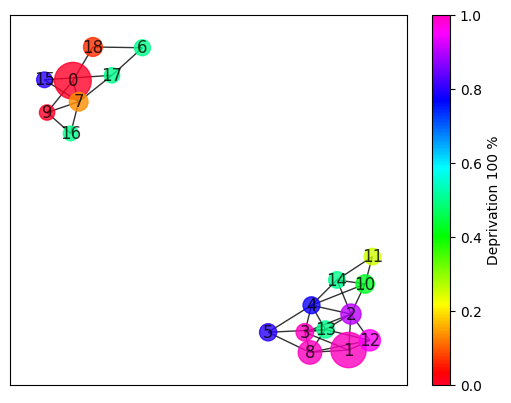

In [249]:
df = pd.DataFrame(df3['depri'])

bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='depri', color_palette=hsvp, colorbar=True, colorbar_label="Deprivation 100 %", pos=nx.spring_layout(bm1.Graph, seed=1))

<Axes: >

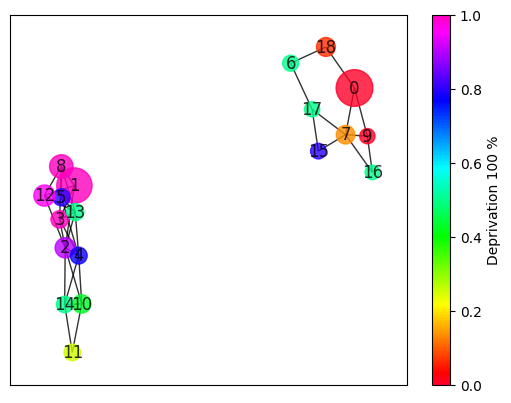

In [243]:
bm1.draw_networkx(coloring_variable='depri', color_palette=hsvp, colorbar=True, colorbar_label="Deprivation 100 %", pos=nx.spring_layout(bm1.Graph, seed=2))

<Axes: >

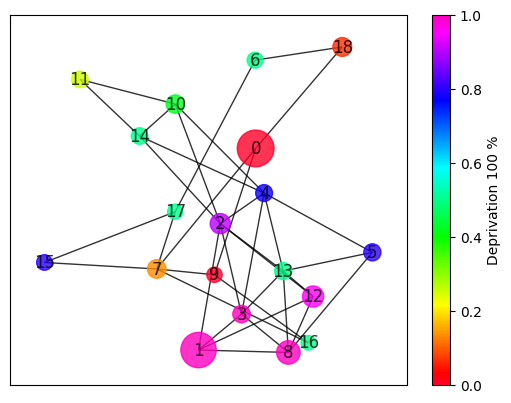

In [246]:
# k=1,seed=1
bm1.draw_networkx(coloring_variable='depri', color_palette=hsvp, colorbar=True, colorbar_label="Deprivation 100 %", pos=nx.spring_layout(bm1.Graph, k=1, seed=1))

<Axes: >

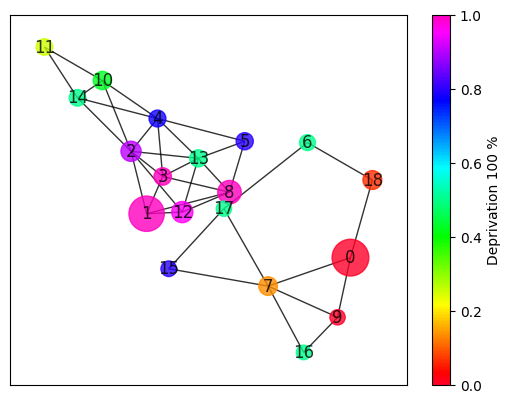

In [251]:
# k=0.5,seed=1
bm1.draw_networkx(coloring_variable='depri', color_palette=hsvp, colorbar=True, colorbar_label="Deprivation 100 %", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

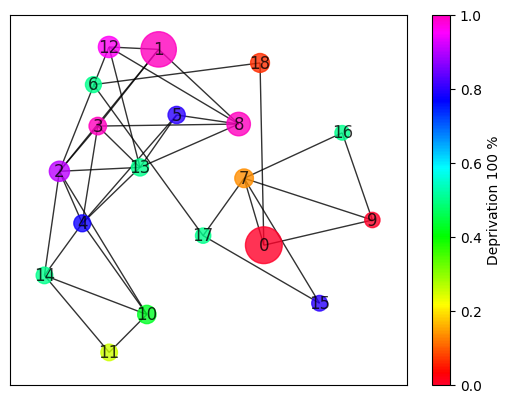

In [252]:
# k=1,seed=2
bm1.draw_networkx(coloring_variable='depri', color_palette=hsvp, colorbar=True, colorbar_label="Deprivation 100 %", pos=nx.spring_layout(bm1.Graph, k=1, seed=2))

<Axes: >

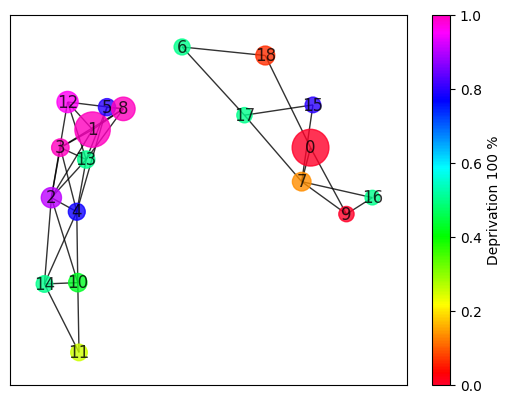

In [253]:
# k=0.5,seed=2
bm1.draw_networkx(coloring_variable='depri', color_palette=hsvp, colorbar=True, colorbar_label="Deprivation 100 %", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=2))

<Axes: >

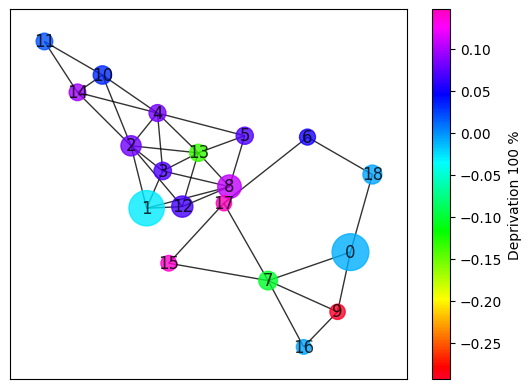

In [256]:
# 减去残差的ballmapper
# k=0.5,seed=1
cdf = pd.DataFrame(df3['residuals'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='residuals', color_palette=hsvp, colorbar=True, colorbar_label="Deprivation 100 %", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

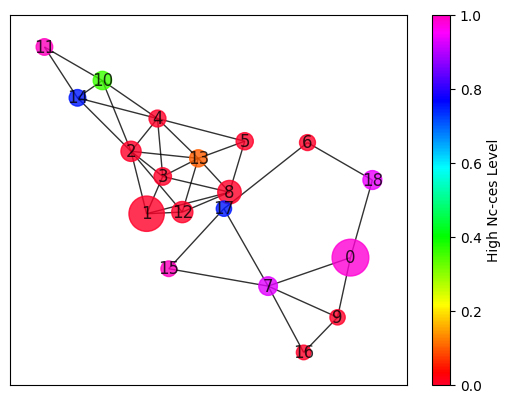

In [258]:
# highl: High Nc-ces Level
cdf = pd.DataFrame(df3['highl'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='highl', color_palette=hsvp, colorbar=True, colorbar_label="High Nc-ces Level", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

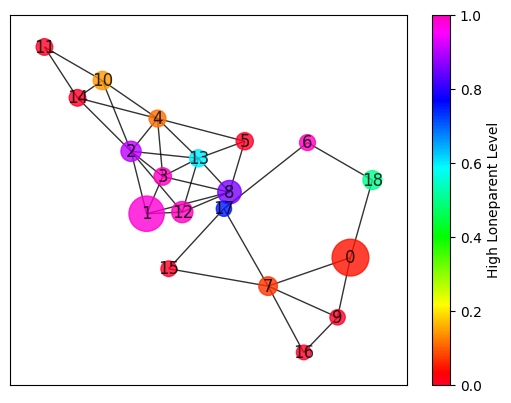

In [259]:
# lonem: Loneparent Level
cdf = pd.DataFrame(df3['lonem'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='lonem', color_palette=hsvp, colorbar=True, colorbar_label="Loneparent Level", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

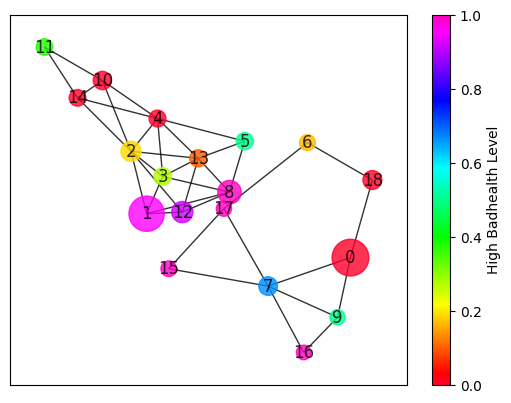

In [260]:
# bhealm: Badhealth Level
cdf = pd.DataFrame(df3['bhealm'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='bhealm', color_palette=hsvp, colorbar=True, colorbar_label="Badhealth Level", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

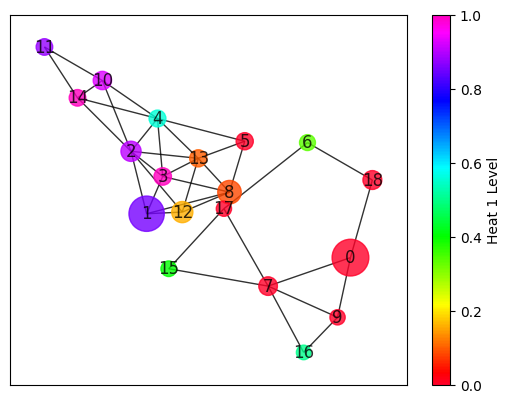

In [261]:
# heat1m: Heat 1 Level
cdf = pd.DataFrame(df3['heat1m'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='heat1m', color_palette=hsvp, colorbar=True, colorbar_label="Heat 1 Level", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

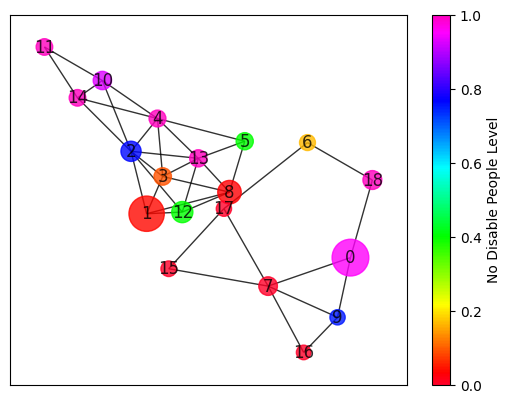

In [262]:
# nodism: No Disable People Level
cdf = pd.DataFrame(df3['nodism'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='nodism', color_palette=hsvp, colorbar=True, colorbar_label="No Disable People Level", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

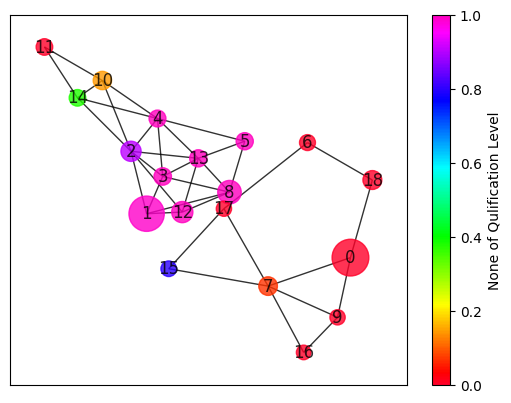

In [263]:
# qnonem: None of Qulification Level
cdf = pd.DataFrame(df3['qnonem'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='qnonem', color_palette=hsvp, colorbar=True, colorbar_label="None of Qulification Level", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

<Axes: >

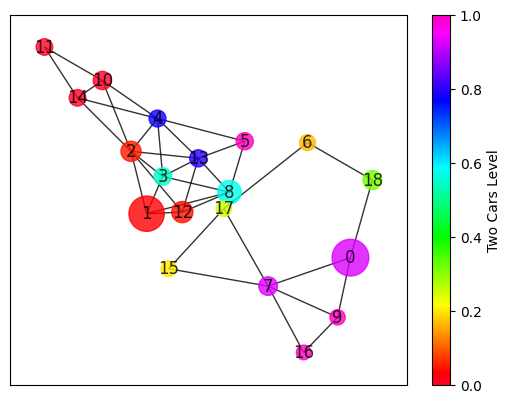

In [264]:
# car2m: Two Cars Level
cdf = pd.DataFrame(df3['car2m'])
bm1=pbm.BallMapper(X=adf, eps=1, coloring_df=cdf)
bm1.draw_networkx(coloring_variable='car2m', color_palette=hsvp, colorbar=True, colorbar_label="Two Cars Level", pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

## Result of BallMapper

In [266]:
pb1 = bm1.points_and_balls()
data['point'] = data.index
df3['point'] = df3.index

fulld = data.merge(pb1, on='point')
subd = df3.merge(pb1, on='point')

ballslist = pd.DataFrame(fulld[["ball","wardcode","ward","depri"]])
ballslist.to_csv('ballresult.csv', index=False)

# 计算每个球的平均值
deprivpm = subd.groupby('ball')['depri'].mean()
highlpm = subd.groupby('ball')['highl'].mean()
lonempm = subd.groupby('ball')['lonem'].mean()
bhealmpm = subd.groupby('ball')['bhealm'].mean()
heat1mpm = subd.groupby('ball')['heat1m'].mean()
nodismpm = subd.groupby('ball')['nodism'].mean()
qnonempm = subd.groupby('ball')['qnonem'].mean()
car2mpm = subd.groupby('ball')['car2m'].mean()

ballmeans = pd.DataFrame([deprivpm,highlpm,lonempm,bhealmpm,heat1mpm,nodismpm,qnonempm,car2mpm])
ballmeans = ballmeans.transpose()

lout = pd.DataFrame(columns=['outp'], index=range(ballmeans.shape[0]))

# 导出结果
for i in range(ballmeans.shape[0]):
    lout.loc[i,'outp'] = ["&" + str(round(ballmeans.iloc[i,0],2))+"&" +  str(round(ballmeans.iloc[i,1],2)) + "&"  + str(round(ballmeans.iloc[i,2],2)) + "&"  + str(round(ballmeans.iloc[i,3],2))+ "&"  + str(round(ballmeans.iloc[i,4],2))+ "&"  + str(round(ballmeans.iloc[i,5],2))+ "&"  + str(round(ballmeans.iloc[i,6],2))]

lout.to_csv('ballresult_mean.txt', sep='\t', index=False)

lout.head()

<ipython-input-266-68af0f333276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['point'] = df3.index


,outp
0,[&0.0&0.98&0.04&0.0&0.0&0.96&0.0]
1,[&1.0&0.0&0.98&0.95&0.85&0.04&0.99]
2,[&0.9&0.0&0.9&0.19&0.9&0.76&0.9]
3,[&1.0&0.0&1.0&0.27&1.0&0.09&1.0]
4,[&0.78&0.0&0.11&0.0&0.56&1.0&1.0]


## Mapping

In [283]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [296]:
gb_shape = gpd.read_file('WD_DEC_2022_UK_BFE.shp')

ERROR:fiona._env:Error in fread() reading object of size 37272 at offset 183486420 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 44680 at offset 183523692 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 15928 at offset 183568372 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 19176 at offset 183584300 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 11816 at offset 183603476 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 4520 at offset 183615292 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 65960 at offset 183619812 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 39368 at offset 183685772 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 9464 at offset 183725140 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 13848 at offset 183734604 from .shp file
ERROR:fiona._env:Error

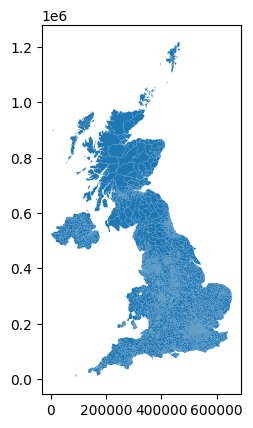

In [297]:
gb_shape.plot(); plt.show()

In [298]:
gb_shape.head()

,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E05000650,Astley Bridge,None,E08000001,Bolton,370670,412906,-2.44479,53.6119,4564641e-d5b7-4c91-a0db-c81ea5a5a994,"POLYGON ((370294.199 414678.699, 370300.399 41..."
1,E05000651,Bradshaw,None,E08000001,Bolton,374590,413058,-2.38555,53.6135,2ebe494f-f561-4f3a-ba3f-cd88a12a3836,"POLYGON ((375025.397 414992.099, 375032.702 41..."
2,E05000652,Breightmet,None,E08000001,Bolton,374437,409641,-2.38758,53.5827,6622af89-782c-4628-b157-31d4bf69e0b8,"POLYGON ((375150.804 410809.796, 375151.101 41..."
3,E05000653,Bromley Cross,None,E08000001,Bolton,372113,414150,-2.42309,53.6231,8b78b994-1999-43cb-9ca2-9bd77fe5b7d6,"POLYGON ((373286.299 414364.499, 373289.267 41..."
4,E05000654,Crompton,None,E08000001,Bolton,371741,410493,-2.42838,53.5903,6679c1c7-d18d-4449-bf9a-2a84931ff05e,"POLYGON ((373168.601 411597.801, 373160.900 41..."


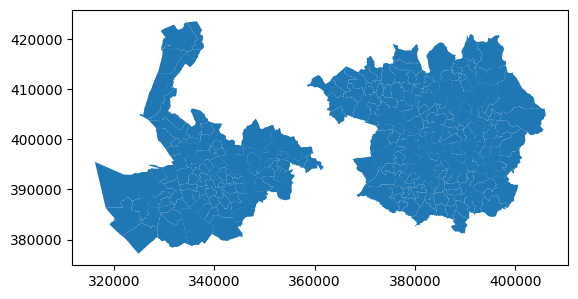

In [300]:
# 重命名列
fulld['WD22CD'] = fulld['wardcode']

# 地图数据merge
gb_shape2=gb_shape.merge(fulld, on='WD22CD')

gb_shape2.plot(); plt.show()

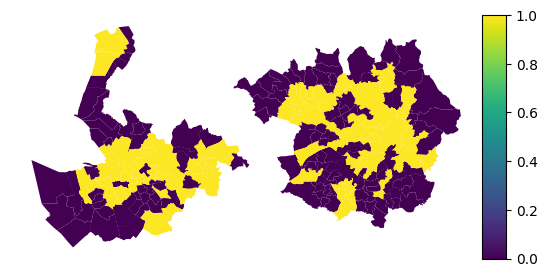

In [302]:
fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="depri",ax=ax,legend=True,cax=cax)
plt.show()

In [303]:
# 结合ballmapper
fulld2 = gb_shape2.merge(pb1, on='point')

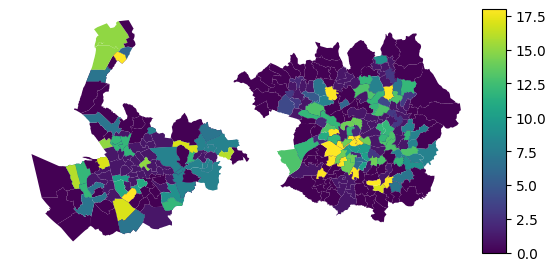

In [305]:
fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="ball",ax=ax,legend=True,cax=cax)
plt.show()

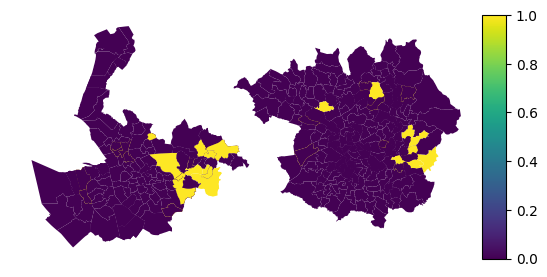

In [307]:
# ball8的数据
gb_shape2['ball8'] = (gb_shape2['ball']==8)*1

fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="ball8",ax=ax,legend=True,cax=cax)
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


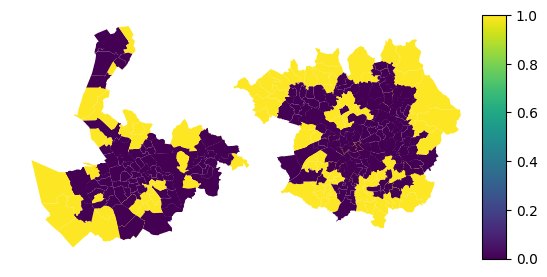

In [310]:
# ball6的数据
gb_shape2['ball0'] = (gb_shape2['ball']==0)*1

fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="ball0",ax=ax,legend=True,cax=cax)
plt.show()

In [311]:
# ~/Downloads/UoM_Yeah!/Course/SOST70011_StatisticalModelling/
# from google.colab import files
# files.download('~/Downloads')

FileNotFoundError: Cannot find file: ~/Downloads